# K Means

Based on **Patric Loeber** video: https://www.youtube.com/watch?v=vtuH4VRq1AU&list=PLqnslRFeH2Upcrywf-u2etjdxxkL8nl7E&index=12

## Goal

Cluster a data set into k different clusters. The data set is unlabeled (unsupervised learning).

Each sample is assigned to the cluster with the nearest mean.

## Notes

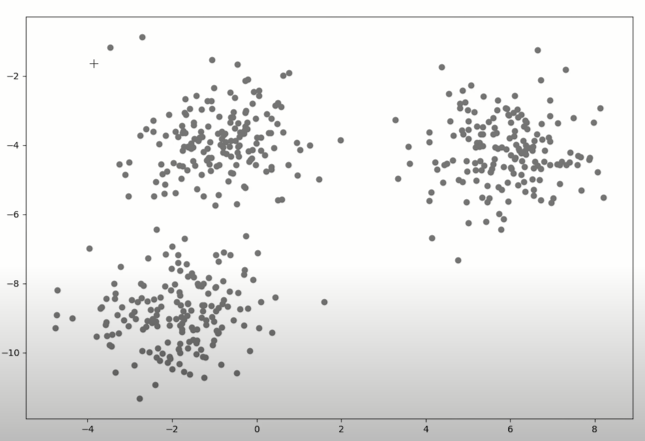

Above we have unlabeled data. In this case we want to find three different clusters. So it should look like below. After clustering we assign the labels to the closest cluster so to the center of the closest cluster.

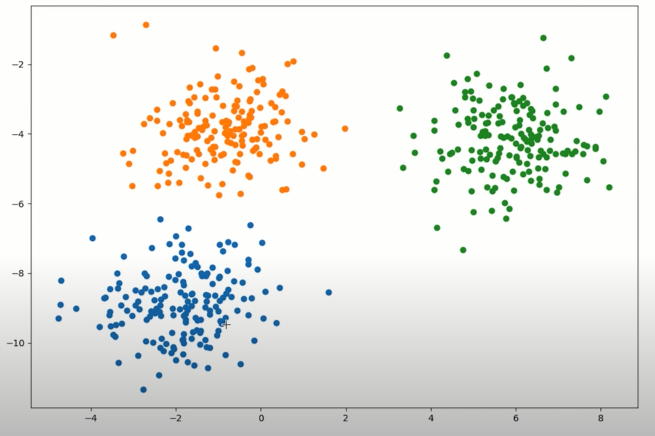

## Iterative optimization

1. Initialize cluster centers (e.g. randomly)
2. Repeat until converged:
    + Update cluster labels: Assign points to the nearest cluster center (centroid)
    + Update cluster centers (centroids): Set center to the mean of each cluster
    
    
## Notes

We randomly pick some samples and say these are our first centers. Then we do these two steps until we are converged. First we update our clouster labels which means  we assign the points to the nearest cluster center. The cluster center is also called centroid. Next we update our centroids so now we set the new center to the mean of each cluster and we iteratively do this until there's no more change.

First we have our unlabeled data set and we randomly pick three centroids like these below. So these are our initial centroids and now we assign the labels to the data to the label of the closest centroid.

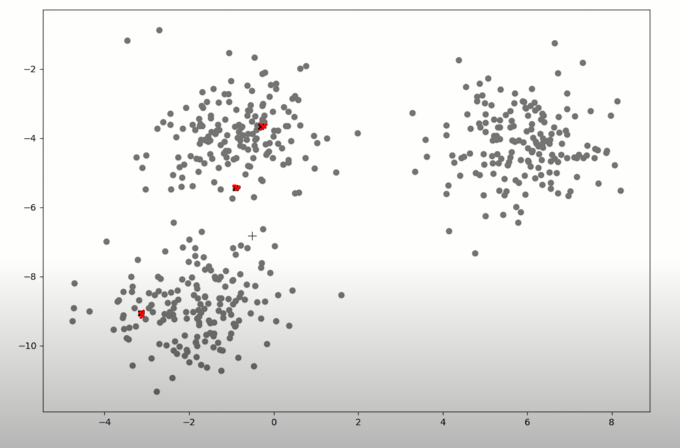

This is our first initialization and now we start optimizing. We update our centroids.

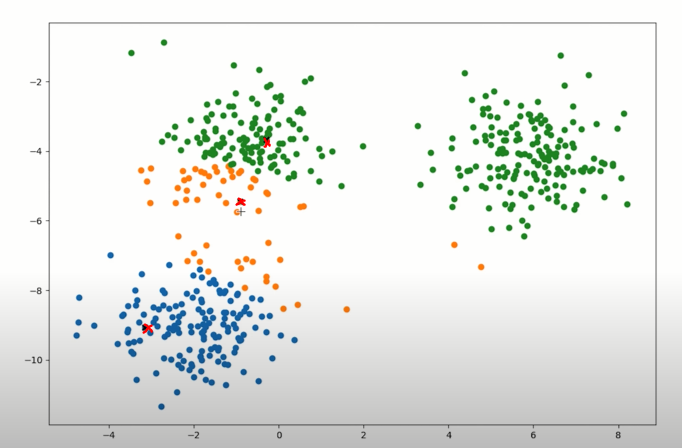

After updating we have new centroids.

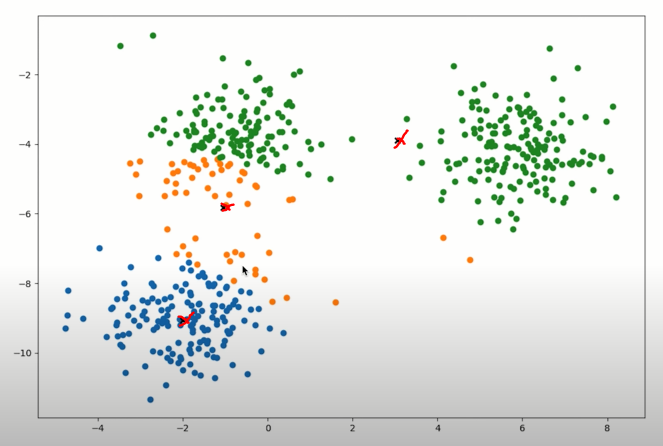

Now we update our labels, we check which is the closest centroid for each label.

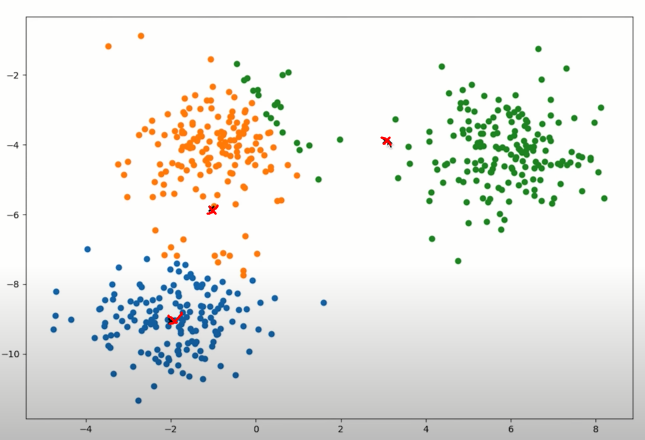

Again we update our centroids.

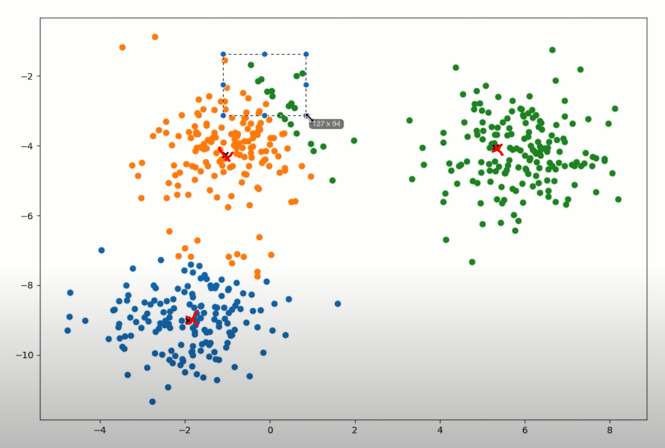

Again we update our labels.

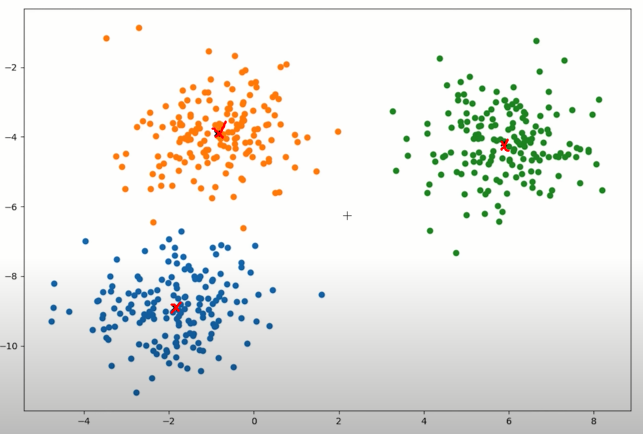

Again we update our centroids

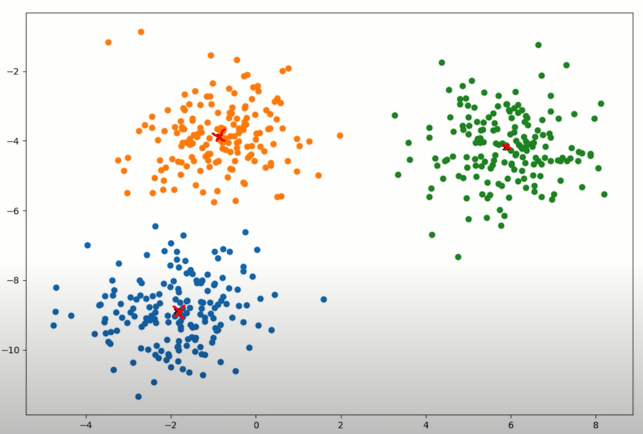

And so on until there is no more change. Until we are converged.

## Euclidean distance

Get the distance between two feature vectors.

### $ d(p,q) = \sqrt{\sum{(p_{i} - q_{i})^2}} $

## Notes

The Euclidean distance between two vectors is defined as the square root of the sum over the squared distances.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# using this to reproduce data, same results
np.random.seed(42)

In [7]:
# defining the Euclidean distance of two vectors
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [8]:
class KMeans:
    
    # plot_steps -> needed for plotting all steps
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K =K
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        
        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # mean feature vector for each cluster
        self.centroids = []
        
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # initialize centroids
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        
        # optimization
        for _ in range(self.max_iters):
            # update clusters
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()
            
            # update centroids
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            if self.plot_steps:
                self.plot()
            # check if converged
            if self._is_converged(centroids_old, self.centroids):
                break
            
        # return cluster labels (idx of cluster)
        return self._get_cluster_labels(self.clusters)
    
    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels
        
    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx
    
    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        # cluster is a list of lists
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    
    # calculate the distances between each new and old centroids
    # for all the centroids and check if this is 0
    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
    
    def plot(self):
        fig, ax = plt.subplots(figsize=(12,8))
        
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        
        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)
            
        plt.show()

In [9]:
from sklearn.datasets import make_blobs

In [10]:
X, y = make_blobs(centers=4, n_samples=500, n_features=2, shuffle=True, random_state=42)
print(X.shape)

(500, 2)


In [11]:
clusters = len(np.unique(y))
print(clusters)

4


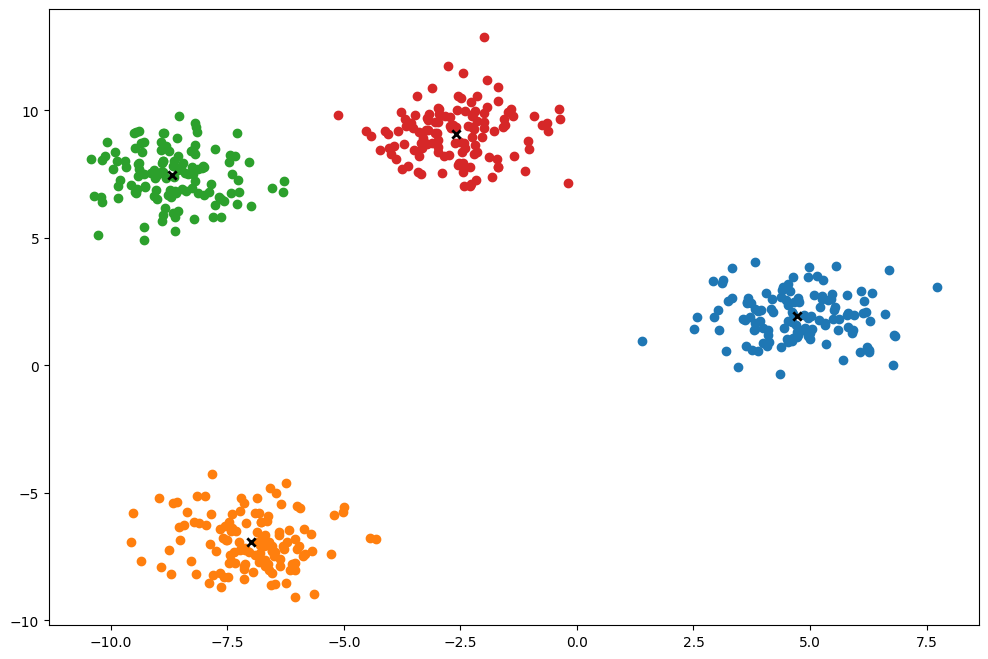

In [12]:
k = KMeans(K=clusters, max_iters=150, plot_steps=False)
y_pred = k.predict(X)

k.plot()

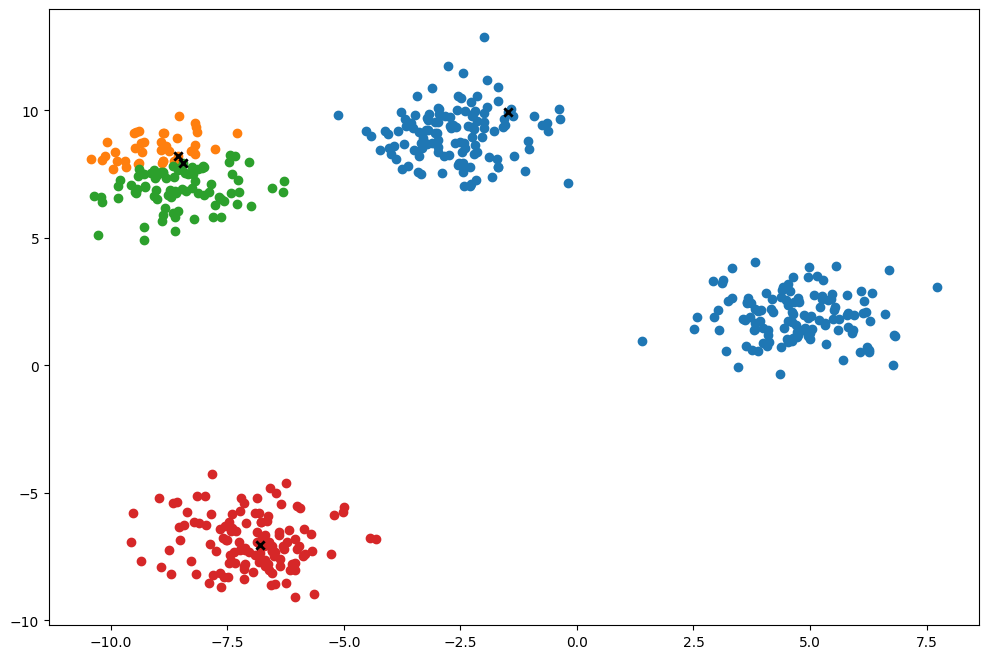

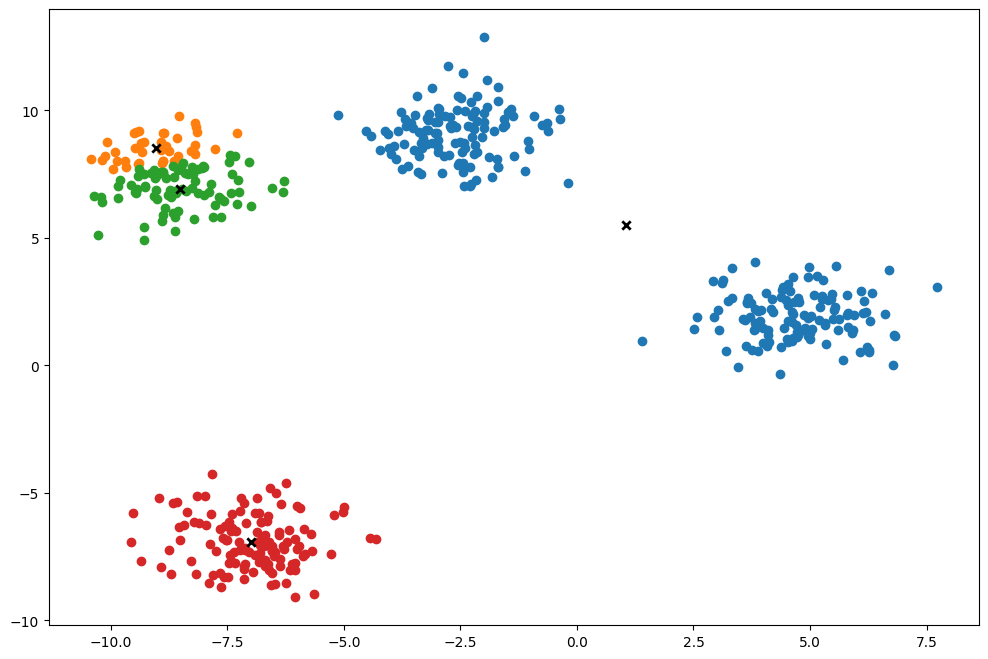

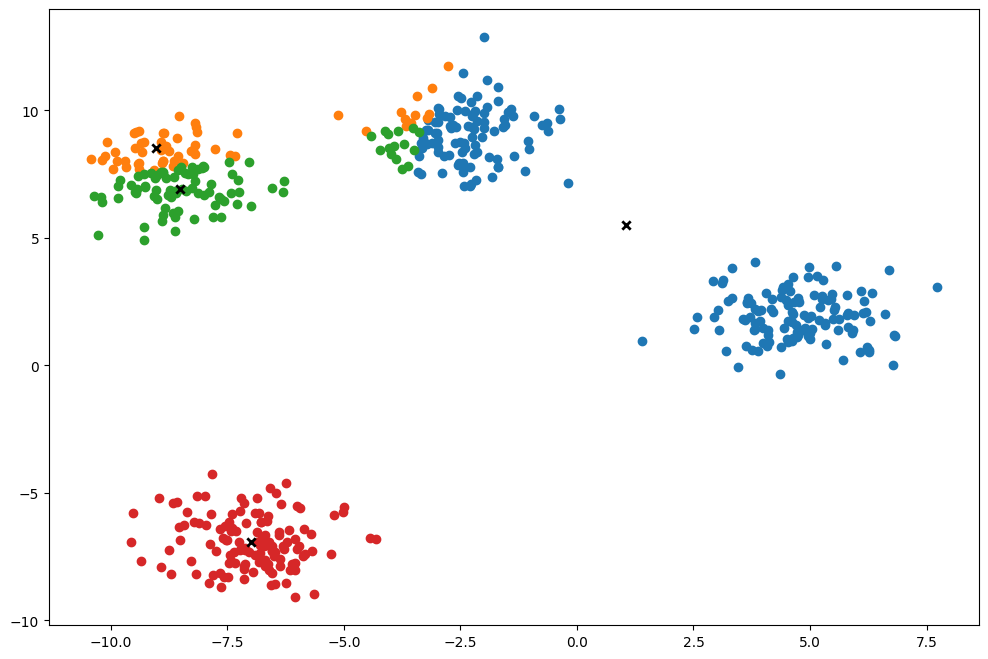

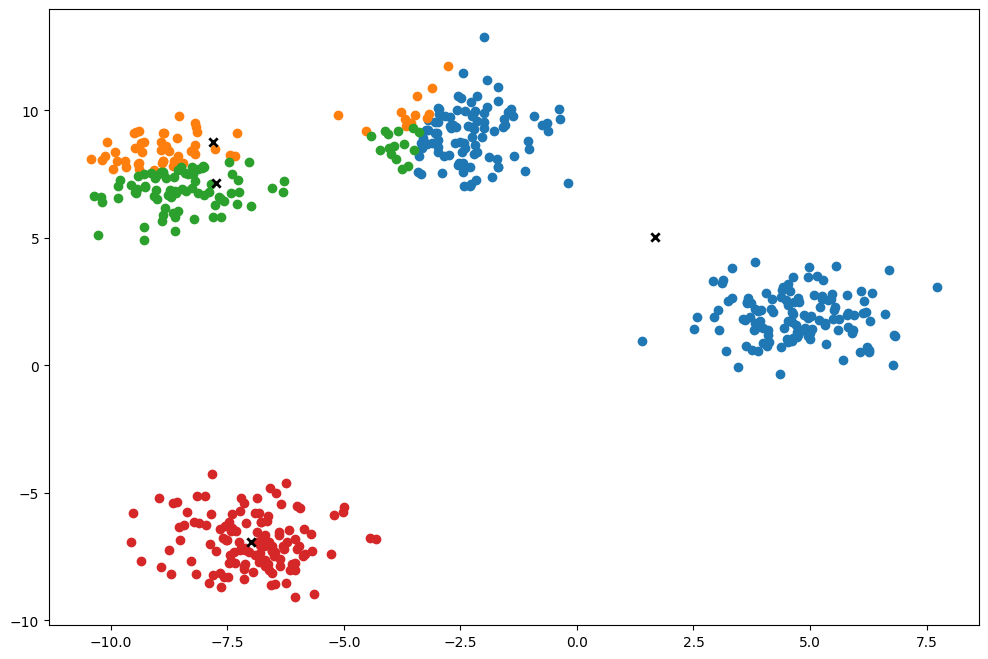

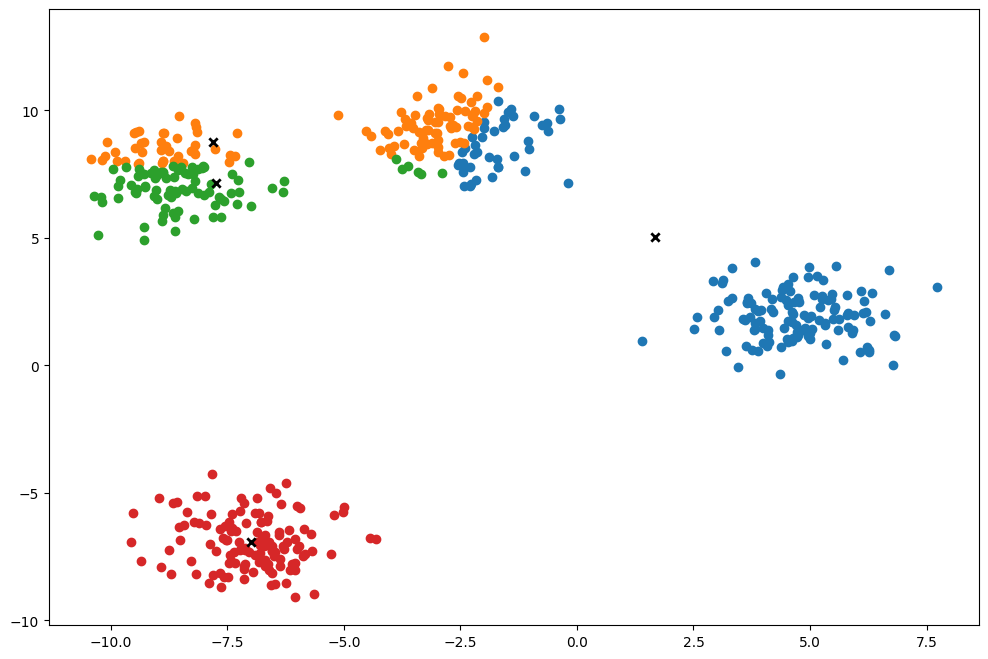

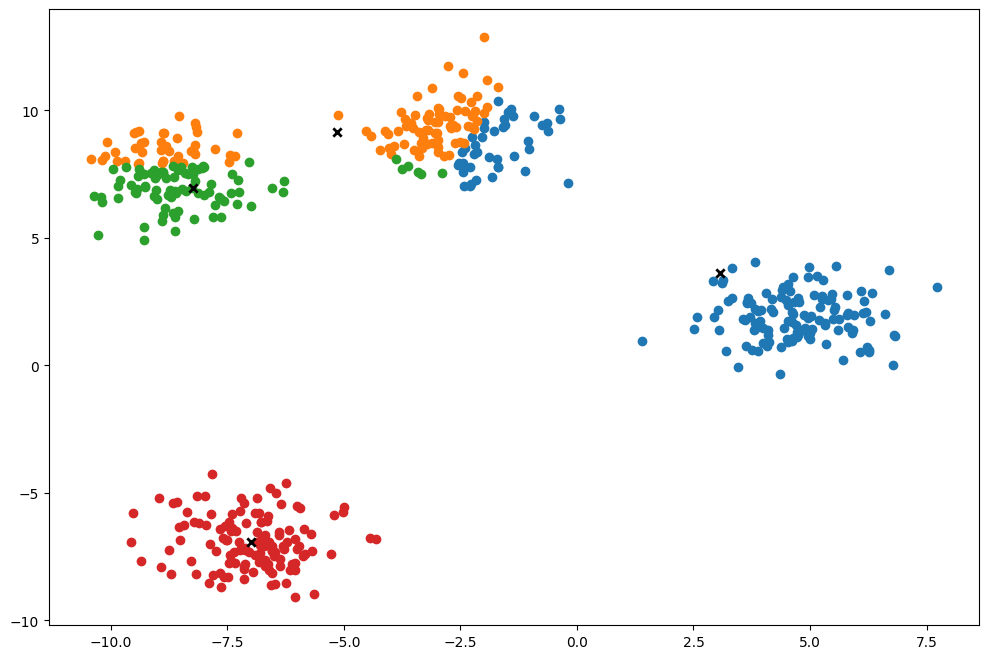

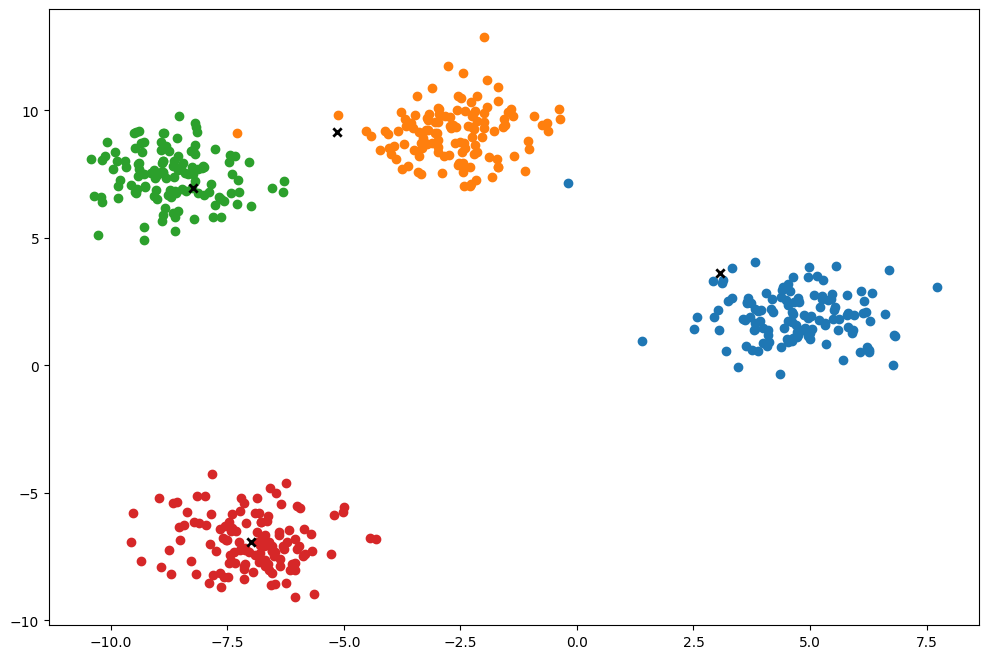

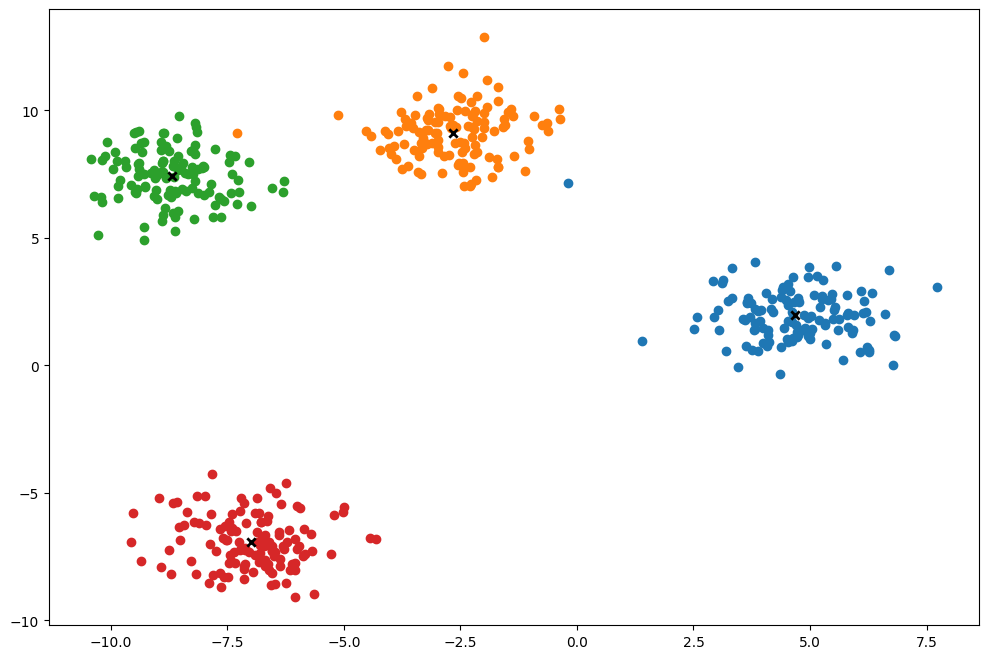

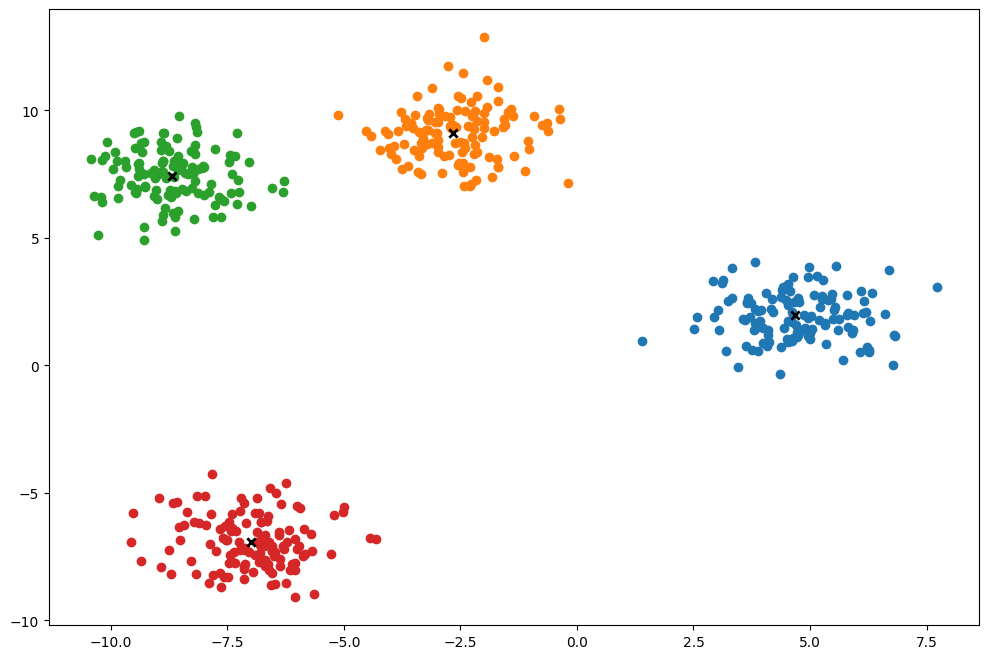

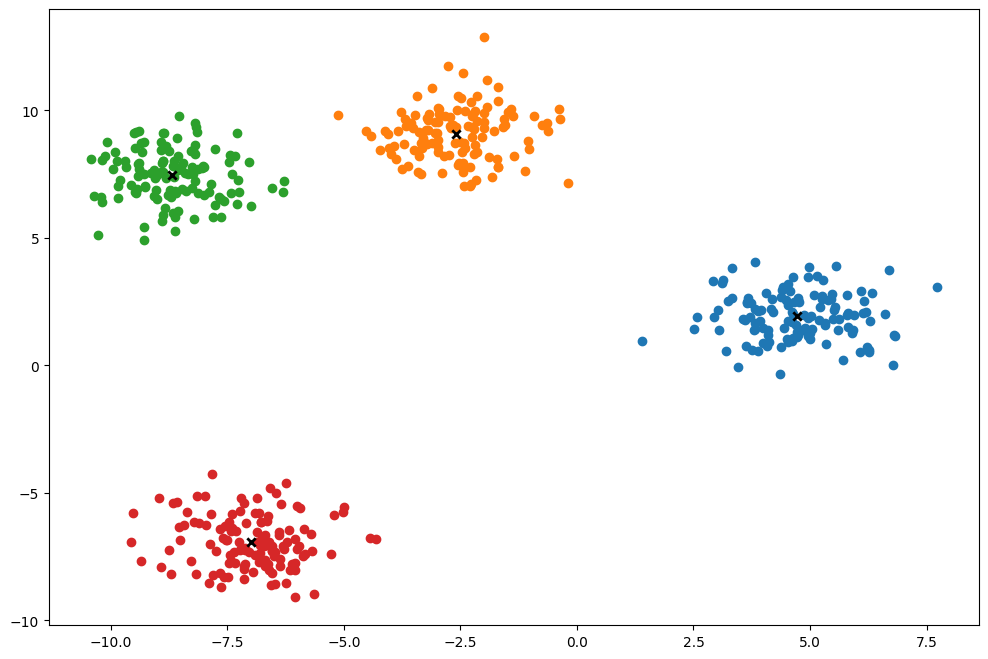

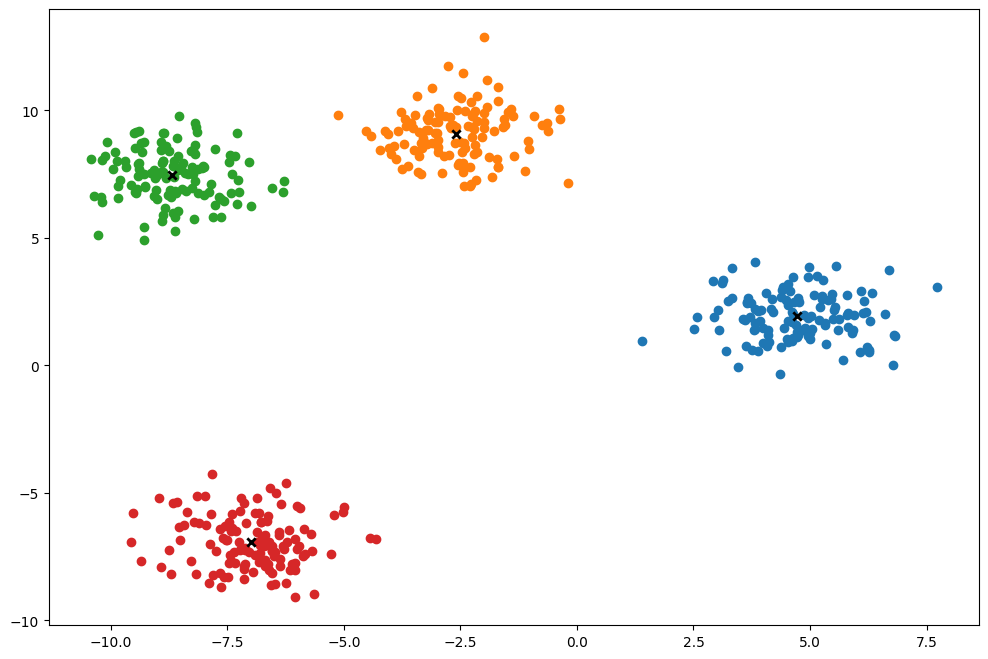

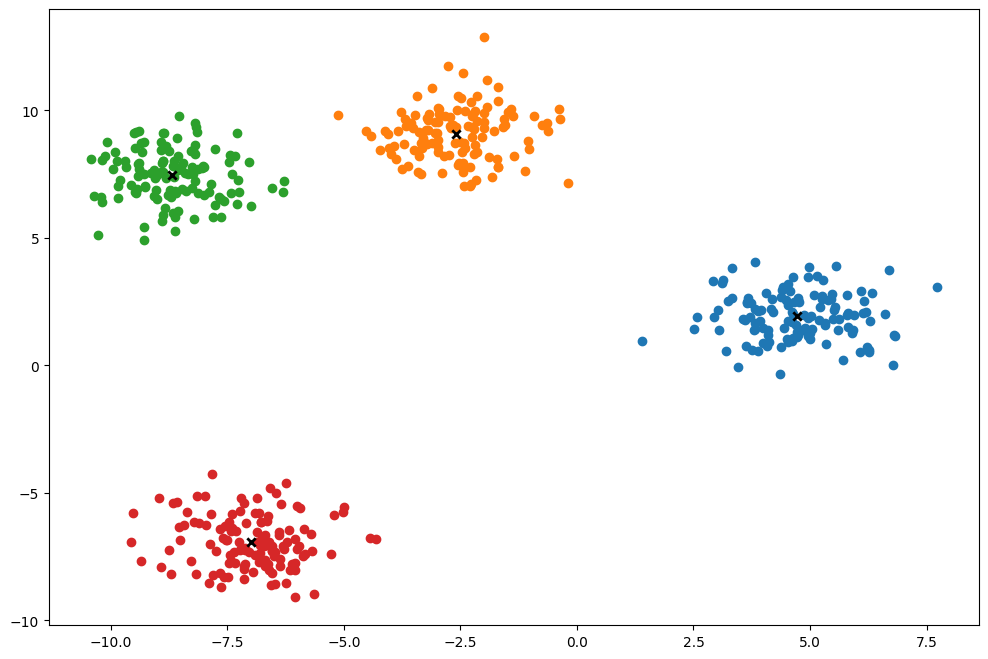

In [16]:
# setting plot_steps=True
k = KMeans(K=clusters, max_iters=150, plot_steps=True)
y_pred = k.predict(X)